In [153]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import wrangle

import warnings
warnings.filterwarnings('ignore')

In [154]:
# set style defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [155]:
# change setting to view all columns in jupyter notebook
pd.set_option('display.max_columns', None)

In [156]:
# use a function to pull in the data
fires = wrangle.wrangle_fires()
fires.head()

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA


# Univariate Analysis

In [157]:
# check info
fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166753 entries, 0 to 2166752
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   fire_year         int64         
 1   discovery_date    datetime64[ns]
 2   general_cause     object        
 3   containment_date  datetime64[ns]
 4   fire_size         float64       
 5   latitude          float64       
 6   longitude         float64       
 7   state             object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 148.8+ MB


In [158]:
# set discovery date as index
df = fires.set_index('discovery_date').sort_index()
df.head(2)

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state
discovery_date,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY


In [159]:
# check oldest and newest discovery dates in the dataset
print(df.index.min(), df.index.max())

1992-01-01 00:00:00 2018-12-31 00:00:00


### We have 27 years of data.

In [160]:
# create a year and month column
df['year'] = df.index.year
df['month'] = df.index.month_name()
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,year,month
discovery_date,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,1992,January


In [161]:
# check counts for each cause
df.general_cause.value_counts()

Missing data/not specified/undetermined       547438
Debris and open burning                       507219
Natural                                       312807
Arson/incendiarism                            310320
Equipment and vehicle use                     175824
Recreation and ceremony                        92725
Misuse of fire by a minor                      64630
Smoking                                        61689
Railroad operations and maintenance            36437
Power generation/transmission/distribution     28491
Fireworks                                      17205
Other causes                                    9763
Firearms and explosives use                     2205
Name: general_cause, dtype: int64

### It looks like a good chunk of our data has no specified cause.

<AxesSubplot:>

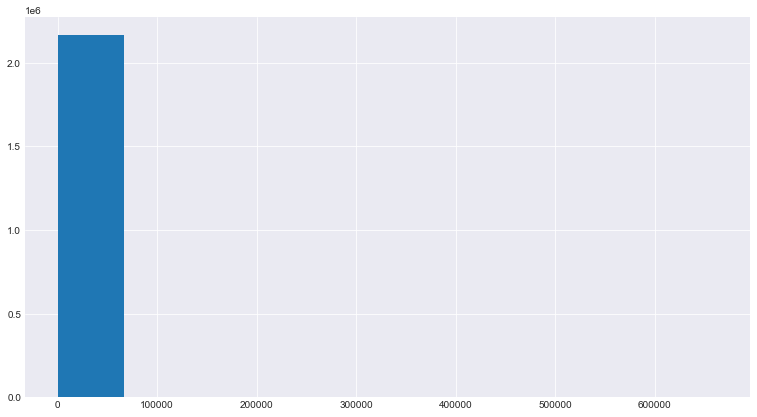

In [162]:
# plot fire size
df.fire_size.hist()

In [163]:
# get statistics for fire size
df.fire_size.describe().apply(lambda x: format(x, 'f'))

count    2166753.000000
mean          75.990398
std         2536.041295
min            0.000010
25%            0.100000
50%            0.970000
75%            3.000000
max       662700.000000
Name: fire_size, dtype: object

### The data contains some outliers when it comes to fire size

In [164]:
# # create a scatter plot of fire by latitude and longitude
# sns.scatterplot(x='longitude', y='latitude', hue='state', data=df)

In [165]:
# check value counts by state
df.state.value_counts()

CA    235229
GA    180175
TX    167061
NC    123793
FL     99356
AZ     93417
NY     93171
SC     86021
MS     83106
AL     72482
OR     67157
CO     61226
MN     48679
OK     48140
MT     47262
NM     41193
ID     40154
WA     37789
AR     36678
WI     35316
SD     34781
UT     34328
TN     33611
LA     32243
NJ     30553
KY     29610
VA     23747
WV     23731
PR     22159
MO     21998
NV     18874
ND     18308
WY     17535
KS     17473
ME     14924
MI     14166
AK     14125
PA     10803
NE     10354
HI      9949
MA      6778
CT      6006
IA      5094
OH      4727
MD      3947
NH      2935
IL      2814
IN      2206
VT       671
RI       631
DE       187
DC        80
Name: state, dtype: int64

### States in the NorthEastern part of the United States have the least wildfires. Not surprisingly, California has the most. Other states with the most wildfires seem to be primarily in the South.

# How has the occurrence of wildfires changed over time? How does wildfire seasonality vary by location?

### What is the number of fires per year for all years we have in the data?

<AxesSubplot:xlabel='year', ylabel='count'>

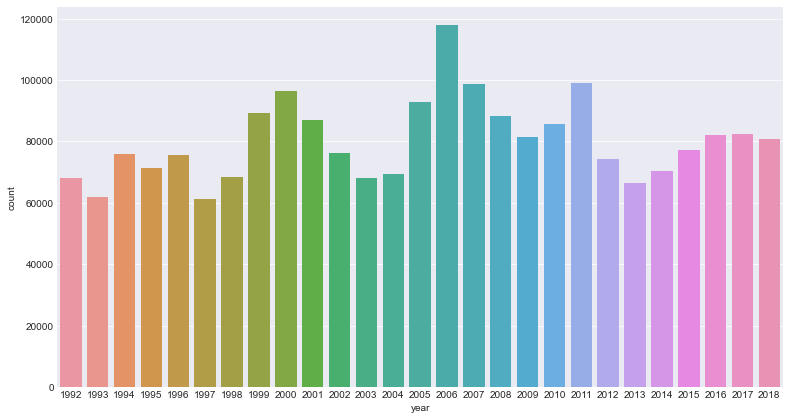

In [166]:
# plot counts by year
sns.countplot(data=df, x='year')

### 2006, 2007, and 2011 had the most wildfires. There does almost appear to be a cycle of 5-6 years for the amount of wildfires.

### Are wildfires more prevalent at certain times of year?

<AxesSubplot:xlabel='month', ylabel='count'>

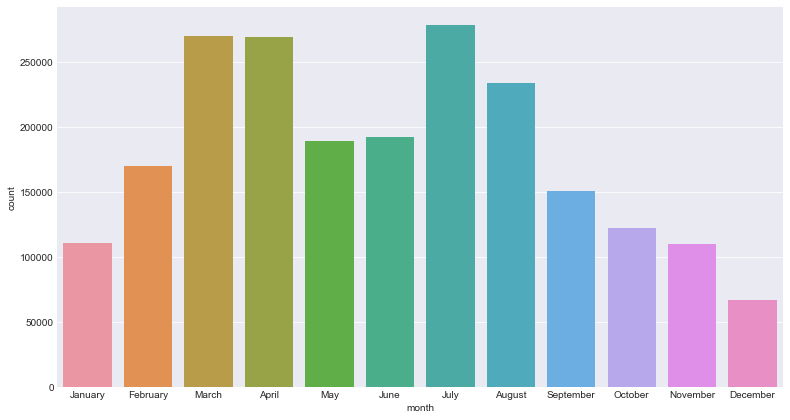

In [167]:
# plot counts by month
sns.countplot(data=df, x='month')

### Not surprisingly, July & August tend to have more fires which is likely due to heat, camping, and dry weather. It is surprising to see that March & April have a higher number of fires as well.

### Get visualization of value counts by state

<AxesSubplot:xlabel='count', ylabel='state'>

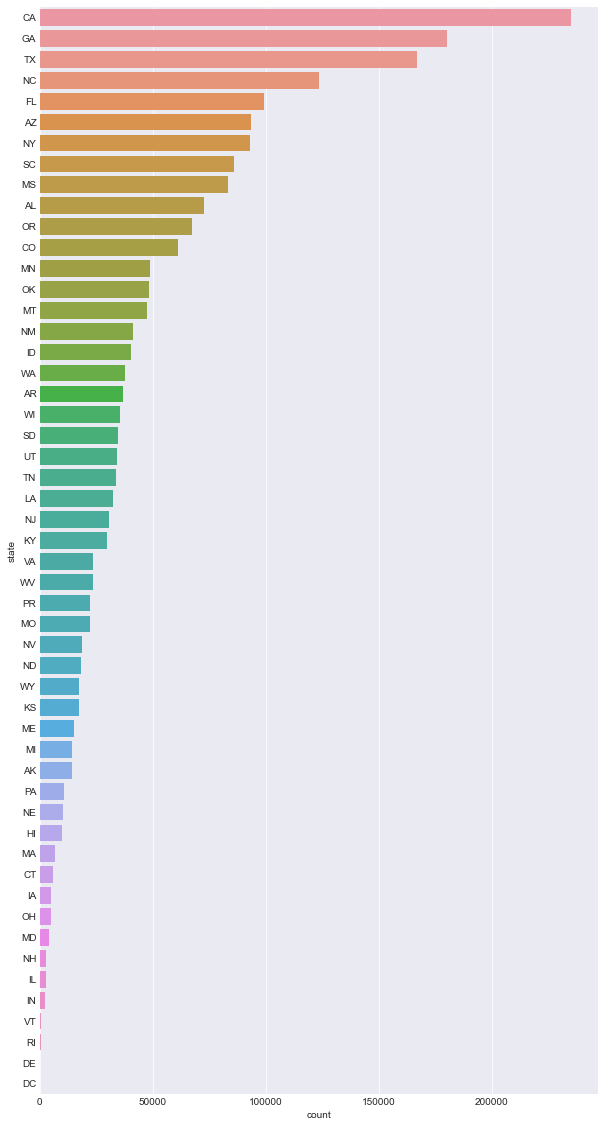

In [168]:
# plot counts by state
plt.figure(figsize=(10,20))
sns.countplot(data=df, y='state', order=df.state.value_counts().index)

In [169]:
# find out what percentage of fires occur in each state
df.state.value_counts(normalize=True)

CA    0.108563
GA    0.083154
TX    0.077102
NC    0.057133
FL    0.045855
AZ    0.043114
NY    0.043000
SC    0.039700
MS    0.038355
AL    0.033452
OR    0.030994
CO    0.028257
MN    0.022466
OK    0.022218
MT    0.021812
NM    0.019011
ID    0.018532
WA    0.017440
AR    0.016928
WI    0.016299
SD    0.016052
UT    0.015843
TN    0.015512
LA    0.014881
NJ    0.014101
KY    0.013666
VA    0.010960
WV    0.010952
PR    0.010227
MO    0.010153
NV    0.008711
ND    0.008450
WY    0.008093
KS    0.008064
ME    0.006888
MI    0.006538
AK    0.006519
PA    0.004986
NE    0.004779
HI    0.004592
MA    0.003128
CT    0.002772
IA    0.002351
OH    0.002182
MD    0.001822
NH    0.001355
IL    0.001299
IN    0.001018
VT    0.000310
RI    0.000291
DE    0.000086
DC    0.000037
Name: state, dtype: float64

In [170]:
x = pd.DataFrame(df.groupby(['year', 'state']).fire_year.count()/df.groupby('year').fire_year.count())
x.index

MultiIndex([(1992, 'AK'),
            (1992, 'AL'),
            (1992, 'AR'),
            (1992, 'AZ'),
            (1992, 'CA'),
            (1992, 'CO'),
            (1992, 'CT'),
            (1992, 'DC'),
            (1992, 'DE'),
            (1992, 'FL'),
            ...
            (2018, 'SD'),
            (2018, 'TN'),
            (2018, 'TX'),
            (2018, 'UT'),
            (2018, 'VA'),
            (2018, 'VT'),
            (2018, 'WA'),
            (2018, 'WI'),
            (2018, 'WV'),
            (2018, 'WY')],
           names=['year', 'state'], length=1369)

### What does the number of fires and size of fires look like by month?

In [171]:
# resample by month and get count of wildfires by month
num_fires_by_month = df.resample('M').fire_year.count()
num_fires_by_month.head()

discovery_date
1992-01-31    3603
1992-02-29    7114
1992-03-31    8706
1992-04-30    7807
1992-05-31    8572
Freq: M, Name: fire_year, dtype: int64

In [172]:
# check number of rows
num_fires_by_month.shape

(324,)

In [173]:
# check which month and year combination had the most fires
num_fires_by_month.idxmax()

Timestamp('2006-03-31 00:00:00', freq='M')

In [174]:
# check how many fires happened that month
num_fires_by_month.max()

19001

### March 2006 had the highest number of fires within the dataset with slightly over 19K fires occurring in that month.

<AxesSubplot:xlabel='discovery_date'>

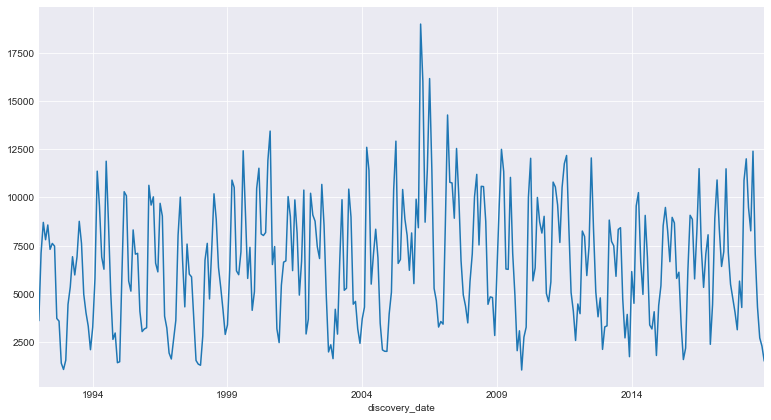

In [175]:
# plot monthly number of fires over the years
num_fires_by_month.plot()

<AxesSubplot:xlabel='discovery_date'>

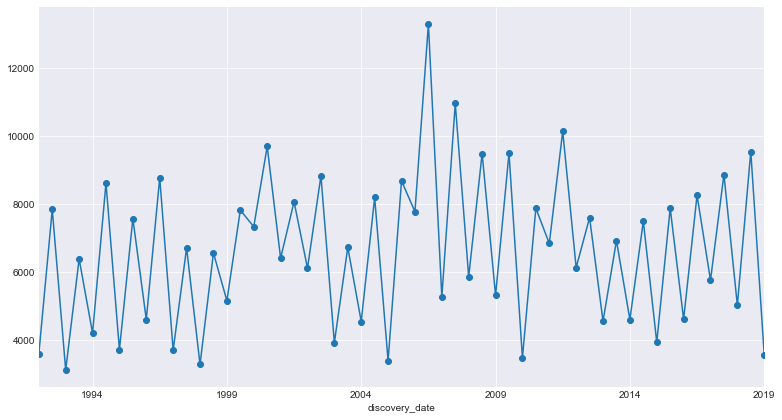

In [176]:
# plot number of fires over the years resampled by 6 months
num_fires_by_month.resample('6M').mean().plot(marker='o')

<AxesSubplot:xlabel='discovery_date'>

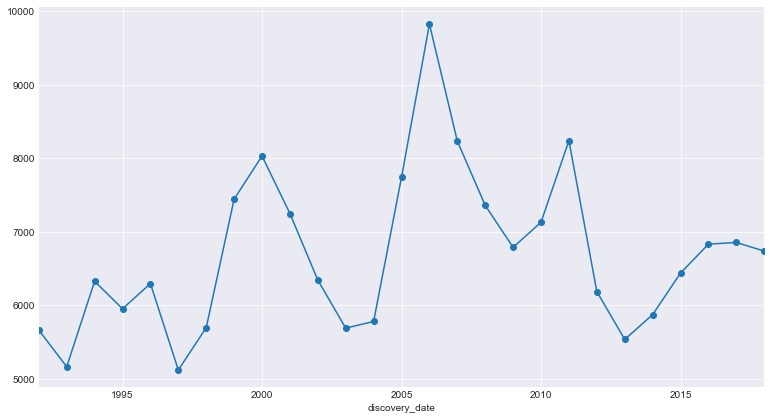

In [177]:
# plot number of fires over the years resampled by a year
num_fires_by_month.resample('Y').mean().plot(marker='o')

In [178]:
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,year,month
discovery_date,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,1992,January


In [179]:
# resample by month and get summed size of wildfires by month
size_fires_by_month = df.resample('M').fire_size.sum()
size_fires_by_month.head()

discovery_date
1992-01-31     32394.200
1992-02-29     84918.650
1992-03-31    129638.123
1992-04-30     94382.285
1992-05-31    124084.533
Freq: M, Name: fire_size, dtype: float64

In [180]:
# check which month and year combination had the largest summed size of wildfires
size_fires_by_month.idxmax()

Timestamp('2015-06-30 00:00:00', freq='M')

In [181]:
# check total sum of fire sizes that month
size_fires_by_month.max()

5248481.509999639

### Figure out how much this is and determine a good reference so audience can understand the impact

<AxesSubplot:xlabel='year'>

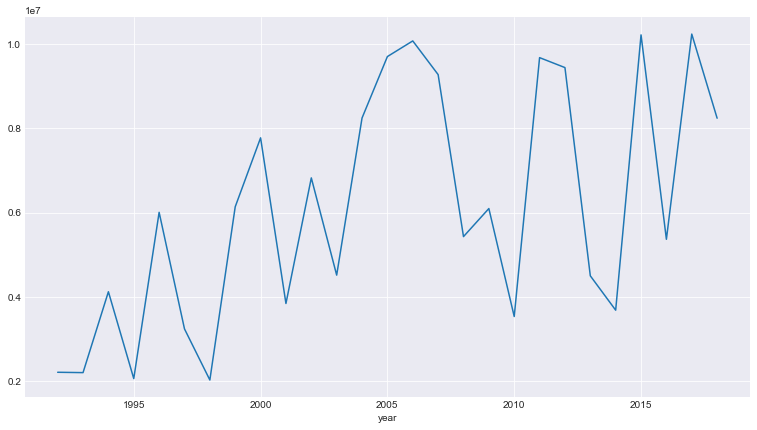

In [182]:
# plot monthly summed size of fires over the years
df.groupby('year').fire_size.sum().plot()

<AxesSubplot:xlabel='discovery_date'>

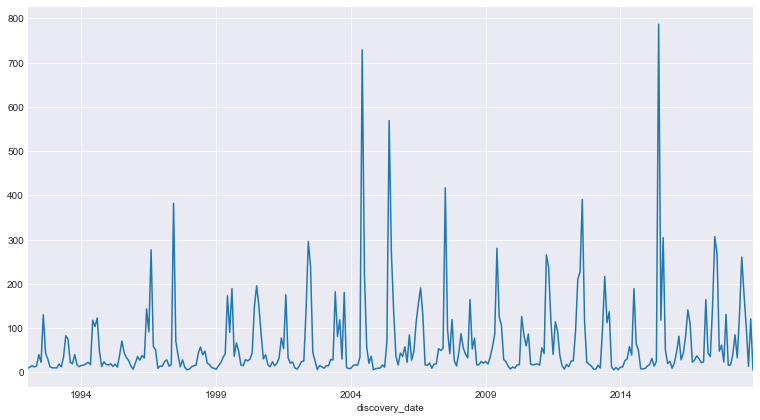

In [183]:
# plot monthly average size of fires over the years
df.resample('M').fire_size.mean().plot()

<AxesSubplot:xlabel='discovery_date'>

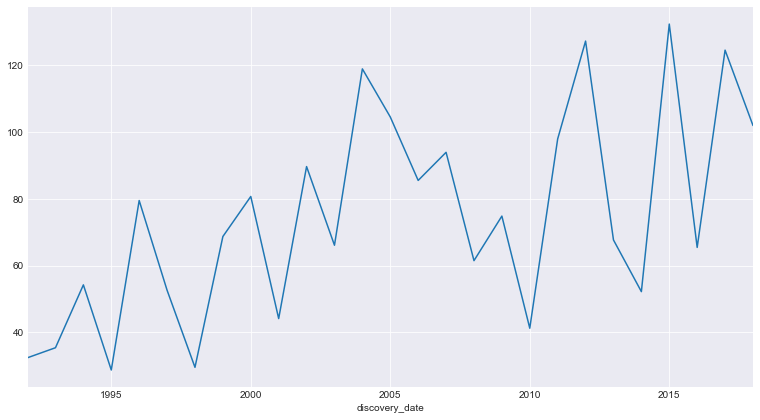

In [184]:
# plot yearly average size of fires over the years
df.resample('Y').fire_size.mean().plot()

### When resampling by year, there is not a clear trend in the *number* of wildfires however, we do see that the average *size* of wildfires is on an upward trend

In [185]:
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,year,month
discovery_date,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,1992,January


In [186]:
# get statistics for fire size
df.fire_size.describe().apply(lambda x: format(x, 'f'))

count    2166753.000000
mean          75.990398
std         2536.041295
min            0.000010
25%            0.100000
50%            0.970000
75%            3.000000
max       662700.000000
Name: fire_size, dtype: object

In [187]:
df[df.fire_size > 100]

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,year,month
discovery_date,,,,,,,,,
1992-01-01,1992,Missing data/not specified/undetermined,NaT,150.0,41.167488,-105.813500,WY,1992,January
1992-01-01,1992,Natural,NaT,400.0,42.946171,-105.897697,WY,1992,January
1992-01-03,1992,Equipment and vehicle use,NaT,175.0,28.500000,-81.700000,FL,1992,January
1992-01-04,1992,Missing data/not specified/undetermined,NaT,240.0,29.790000,-84.950000,FL,1992,January
1992-01-04,1992,Missing data/not specified/undetermined,NaT,300.0,41.239269,-104.820198,WY,1992,January
...,...,...,...,...,...,...,...,...,...
2018-12-20,2018,Missing data/not specified/undetermined,2018-12-20,110.0,35.651100,-98.389700,OK,2018,December
2018-12-20,2018,Missing data/not specified/undetermined,2018-12-22,420.0,36.670800,-96.732200,OK,2018,December
2018-12-23,2018,Missing data/not specified/undetermined,2018-12-23,559.0,29.562045,-94.466741,TX,2018,December


In [188]:
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,year,month
discovery_date,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,1992,January


In [189]:
top_five_wildfire_states = df.state.value_counts().head(5).index.to_list()
top_five_wildfire_states

['CA', 'GA', 'TX', 'NC', 'FL']

In [190]:
num_fires_by_year = df[df.state.isin(top_five_wildfire_states)]\
.groupby(['year', 'state']).count().reset_index()\
.iloc[:, 0:3].rename(columns={'fire_year':'num_fires'})
num_fires_by_year

,year,state,num_fires
0,1992,CA,10831
1,1992,FL,4222
2,1992,GA,6458
3,1992,NC,5696
4,1992,TX,1168
...,...,...,...
130,2018,CA,9488
131,2018,FL,2072
132,2018,GA,2574
133,2018,NC,3085


<AxesSubplot:xlabel='year', ylabel='num_fires'>

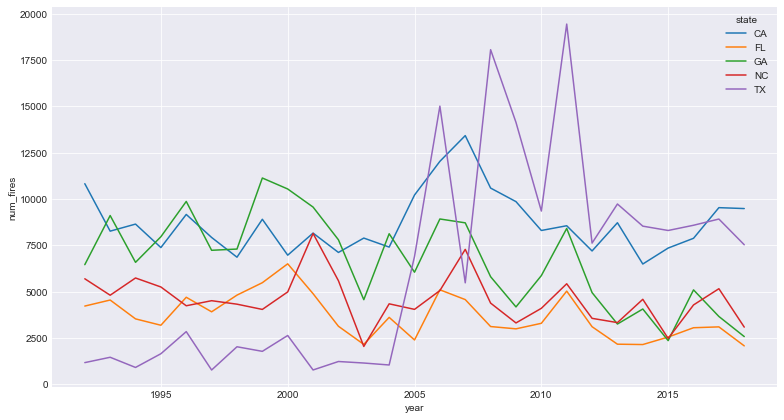

In [191]:

sns.lineplot(data=num_fires_by_year, x='year', y='num_fires', hue='state')

In [192]:

top_causes_of_wildfires = df.general_cause.value_counts().head()
top_causes_of_wildfires

Missing data/not specified/undetermined    547438
Debris and open burning                    507219
Natural                                    312807
Arson/incendiarism                         310320
Equipment and vehicle use                  175824
Name: general_cause, dtype: int64

In [193]:
top_causes_of_wildfires[1:].index.to_list()

['Debris and open burning',
 'Natural',
 'Arson/incendiarism',
 'Equipment and vehicle use']

In [194]:
# create a new dataframe that groups by year and gets a count by year of the top causes for wildfires
num_causes_by_year = df[df.general_cause.isin(top_causes_of_wildfires[1:].index.to_list())]\
.groupby(['year', 'general_cause']).count().reset_index().iloc[:, 0:3]\
.rename(columns={'fire_year':'num_occurrences'})
num_causes_by_year

,year,general_cause,num_occurrences
0,1992,Arson/incendiarism,11250
1,1992,Debris and open burning,12792
2,1992,Equipment and vehicle use,5637
3,1992,Natural,12576
4,1993,Arson/incendiarism,11036
...,...,...,...
103,2017,Natural,8752
104,2018,Arson/incendiarism,6019
105,2018,Debris and open burning,18674
106,2018,Equipment and vehicle use,7385


<AxesSubplot:xlabel='year', ylabel='num_occurrences'>

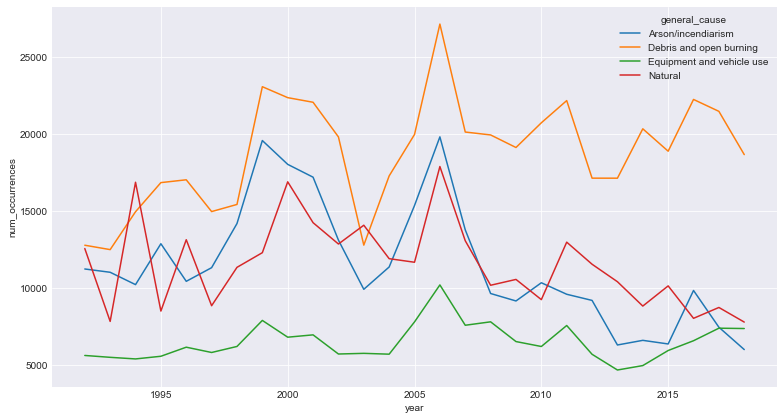

In [195]:
# plot trends over the years by the top four causes of wildfires, excluding observations where cause was not specified
sns.lineplot(data=num_causes_by_year, x='year', y='num_occurrences', hue='general_cause')

In [196]:
num_causes_by_year.head()

,year,general_cause,num_occurrences
0,1992,Arson/incendiarism,11250
1,1992,Debris and open burning,12792
2,1992,Equipment and vehicle use,5637
3,1992,Natural,12576
4,1993,Arson/incendiarism,11036


In [197]:
num_causes_by_year.to_csv('num_causes_by_year')

In [198]:
num_causes_by_year.shape

(108, 3)

Text(0.5, 1.0, 'Top Causes Of Wildfires Across The U.S.')

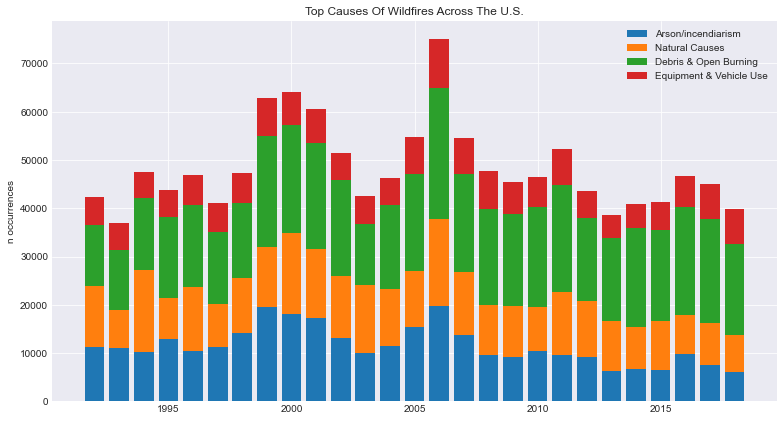

In [199]:
natural = num_causes_by_year[num_causes_by_year.general_cause == "Natural"]
arson = num_causes_by_year[num_causes_by_year.general_cause == "Arson/incendiarism"]
debris = num_causes_by_year[num_causes_by_year.general_cause == "Debris and open burning"]
equipment = num_causes_by_year[num_causes_by_year.general_cause == "Equipment and vehicle use"]

natural = natural.set_index("year")
arson = arson.set_index("year")
equipment = equipment.set_index("year")
debris = debris.set_index("year")

fig, ax = plt.subplots()
labels = arson.index

ax.bar(labels, arson.num_occurrences, label="Arson/incendiarism")
ax.bar(labels, natural.num_occurrences, label="Natural Causes", bottom=arson.num_occurrences)
ax.bar(labels, debris.num_occurrences, label="Debris & Open Burning", bottom=natural.num_occurrences + arson.num_occurrences)
ax.bar(labels, equipment.num_occurrences, label="Equipment & Vehicle Use", bottom=debris.num_occurrences + natural.num_occurrences + arson.num_occurrences)

ax.legend()
ax.set_ylabel("n occurrences")
ax.set_title("Top Causes Of Wildfires Across The U.S.")

<AxesSubplot:xlabel='count', ylabel='year'>

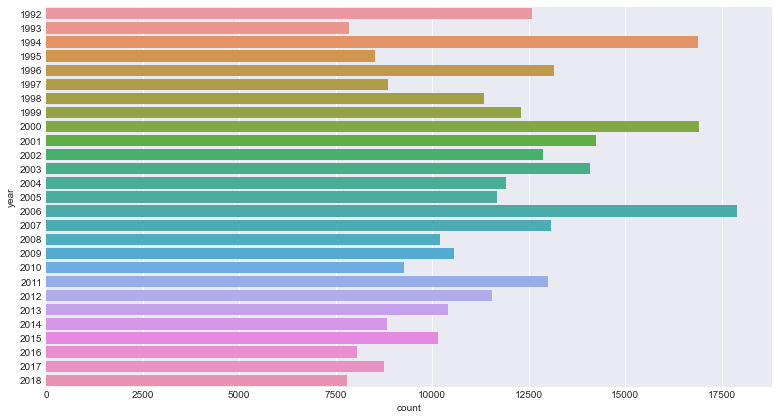

In [200]:
# plot wildfires caused by natural causes by year
sns.countplot(data=df[df.general_cause == 'Natural'], y='year')

### In recent years, we have seen a decrease in number of wildfires that were caused by natural causes

<AxesSubplot:xlabel='count', ylabel='year'>

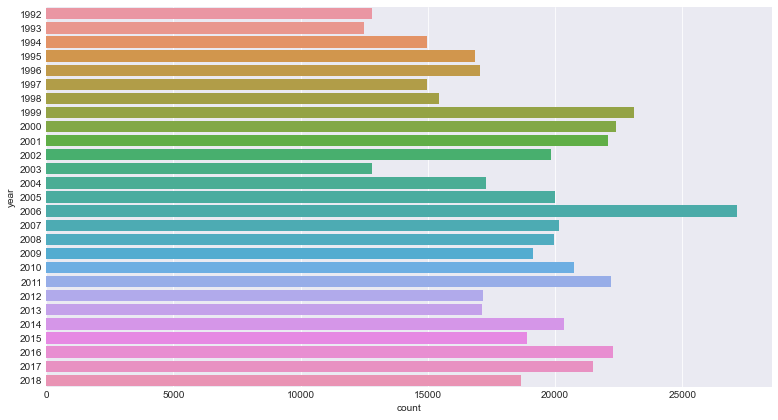

In [201]:
# plot wildfires caused by Debris and open burning by year
sns.countplot(data=df[df.general_cause == 'Debris and open burning'], y='year')

### There appears to be a slight upward trend in debris and open burning as a cause of wildfires

<AxesSubplot:xlabel='count', ylabel='year'>

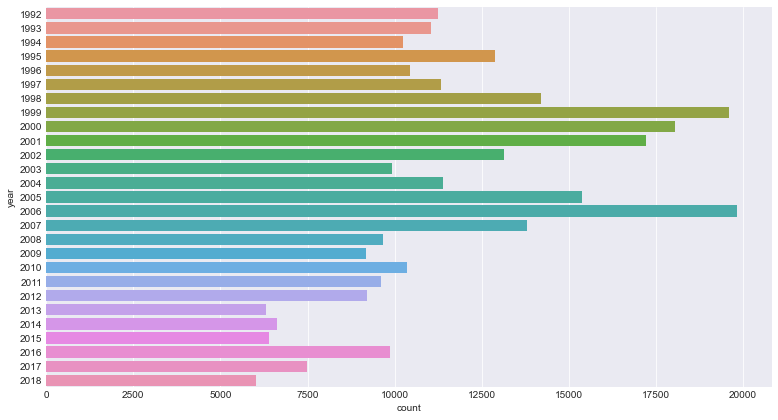

In [202]:
# plot wildfires caused by Arson/incendiarism by year
sns.countplot(data=df[df.general_cause == 'Arson/incendiarism'], y='year')

### There are some spikes but otherwise a downward trend in arson/incendiarism as a cause for wildfires

<AxesSubplot:xlabel='count', ylabel='year'>

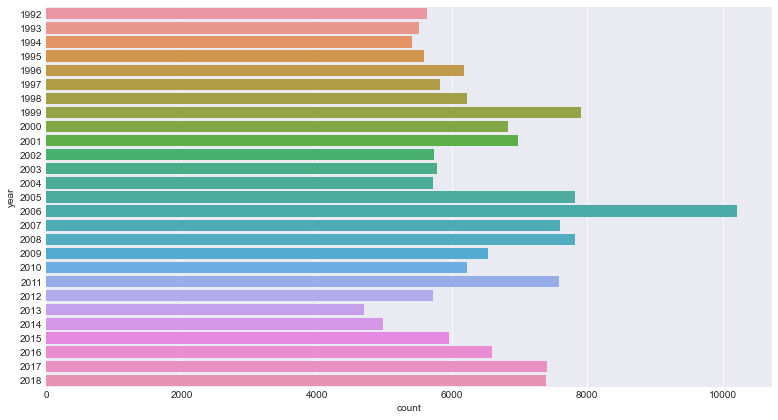

In [203]:
# plot wildfires caused by Equipment and vehicle use by year
sns.countplot(data=df[df.general_cause == 'Equipment and vehicle use'], y='year')

### There are no obvious trends or anything that really stands out in this plot for equipment and vehicle use as a cause for wildfires. 

### There's no one cause for the higher number of fires in 2006. All causes have higher numbers for this year.

In [204]:
# get statistics for fire size
df.fire_size.describe().apply(lambda x: format(x, 'f'))

count    2166753.000000
mean          75.990398
std         2536.041295
min            0.000010
25%            0.100000
50%            0.970000
75%            3.000000
max       662700.000000
Name: fire_size, dtype: object

### I want to get a better understanding of range of wildfire sizes

In [205]:
print(f'The 10th percentile is: {df.fire_size.quantile(.1)}')
print(f'The 20th percentile is: {df.fire_size.quantile(.2)}')
print(f'The 25th percentile is: {df.fire_size.quantile(.25)}')
print(f'The 30th percentile is: {df.fire_size.quantile(.3)}')
print(f'The 40th percentile is: {df.fire_size.quantile(.4)}')
print(f'The 50th percentile is: {df.fire_size.quantile(.5)}')
print(f'The 60th percentile is: {df.fire_size.quantile(.6)}')
print(f'The 70th percentile is: {df.fire_size.quantile(.7)}')
print(f'The 75th percentile is: {df.fire_size.quantile(.75)}')
print(f'The 80th percentile is: {df.fire_size.quantile(.8)}')
print(f'The 90th percentile is: {df.fire_size.quantile(.9)}')
print(f'The 100th percentile is: {df.fire_size.quantile(1)}')

The 10th percentile is: 0.1
The 20th percentile is: 0.1
The 25th percentile is: 0.1
The 30th percentile is: 0.16
The 40th percentile is: 0.3
The 50th percentile is: 0.97
The 60th percentile is: 1.0
The 70th percentile is: 2.0
The 75th percentile is: 3.0
The 80th percentile is: 5.0
The 90th percentile is: 15.5
The 100th percentile is: 662700.0


<AxesSubplot:>

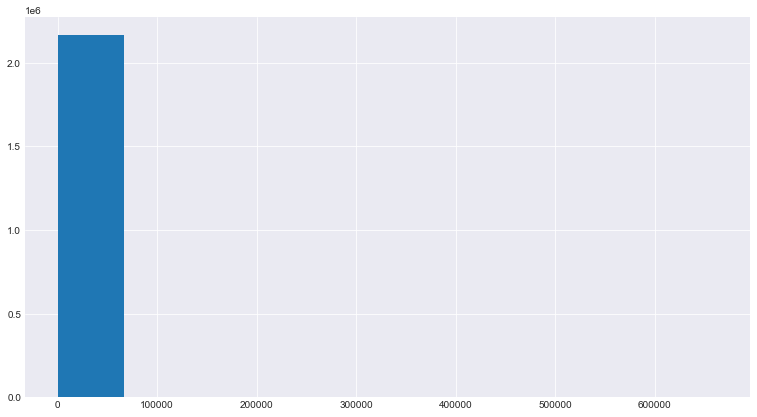

In [206]:
df.fire_size.hist()

In [207]:
df[df.fire_size > 100000].shape

(210, 9)

<AxesSubplot:>

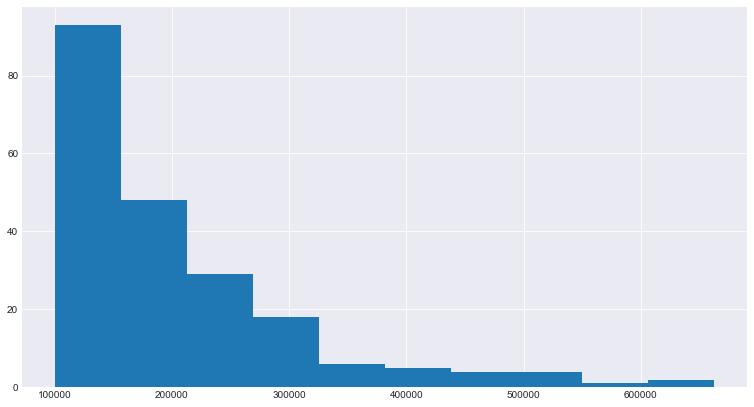

In [208]:
# check 
df[df.fire_size > 100000].fire_size.hist()

<AxesSubplot:xlabel='year', ylabel='count'>

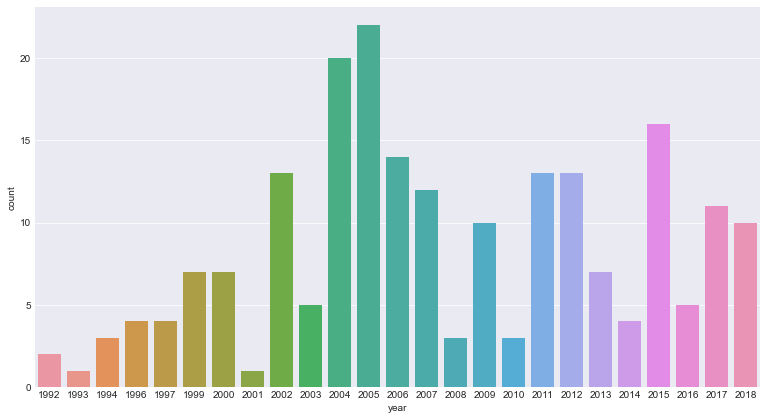

In [209]:
# plot counts of large fires by year
sns.countplot(data=df[df.fire_size > 100000], x='year')

### I want to graph the average size of wildfires per decade to see if I can clearly represent the trend to our audience.

In [210]:
# create another column categorizing decade
conditions = [df.year < 2000, df.year <2010, df.year <2020]
choices = ['1992 - 1999', '2000 - 2009', '2010 - ']
df['decade'] = np.select(conditions, choices)
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,year,month,decade
discovery_date,,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,1992,January,1992 - 1999
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,1992,January,1992 - 1999
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,1992,January,1992 - 1999
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,1992,January,1992 - 1999
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,1992,January,1992 - 1999


<AxesSubplot:xlabel='decade', ylabel='fire_size'>

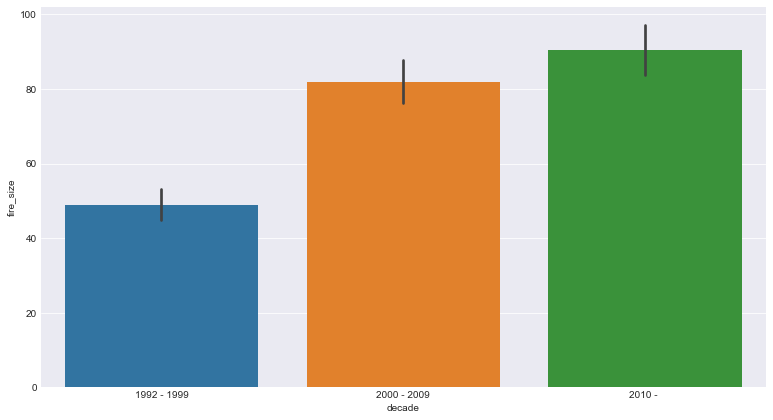

In [211]:
# plot average fire size by decade
sns.barplot(data=df, x='decade', y='fire_size')

### I am also going to try to graph average fire size per quinquennial between 1995-2015 to see if that also represents this trend

In [212]:
# create another dataframe where I can chunk the data into 5-year periods
df2 = df[(df.year >=1996) & (df.year <=2015)]
df2.year.value_counts().sort_index()

1996     75561
1997     61442
1998     68356
1999     89350
2000     96397
2001     87001
2002     76128
2003     68279
2004     69371
2005     92920
2006    117944
2007     98832
2008     88322
2009     81477
2010     85578
2011     98904
2012     74258
2013     66434
2014     70480
2015     77275
Name: year, dtype: int64

In [213]:
# create another column categorizing quinquennial
conditions = [df2.year <= 2000, df2.year <= 2005, df2.year <= 2010, df2.year <= 2015]
choices = ['1996 - 2000', '2001 - 2005', '2006 - 2010', '2011 - 2015']
df2['quinquennial'] = np.select(conditions, choices)
df2.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,year,month,decade,quinquennial
discovery_date,,,,,,,,,,,
1996-01-01,1996,Missing data/not specified/undetermined,NaT,0.10,34.011944,-117.391111,CA,1996,January,1992 - 1999,1996 - 2000
1996-01-01,1996,Debris and open burning,1996-01-01,6.77,31.892300,-81.873900,GA,1996,January,1992 - 1999,1996 - 2000
1996-01-01,1996,Missing data/not specified/undetermined,NaT,0.10,33.778889,-117.216111,CA,1996,January,1992 - 1999,1996 - 2000
1996-01-01,1996,Missing data/not specified/undetermined,NaT,0.30,33.521111,-116.901944,CA,1996,January,1992 - 1999,1996 - 2000
1996-01-01,1996,Equipment and vehicle use,NaT,0.10,34.026944,-117.426111,CA,1996,January,1992 - 1999,1996 - 2000


<AxesSubplot:xlabel='quinquennial', ylabel='fire_size'>

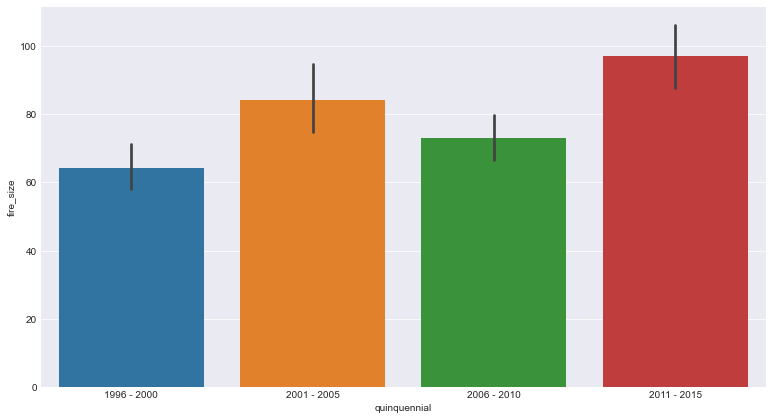

In [214]:
# plot average fire size by quinquennial
sns.barplot(data=df2, x='quinquennial', y='fire_size')

In [215]:
yearly_mean_fire_size = df.groupby('year').fire_size.mean().reset_index()

AttributeError: 'Text' object has no property 'color_palette'

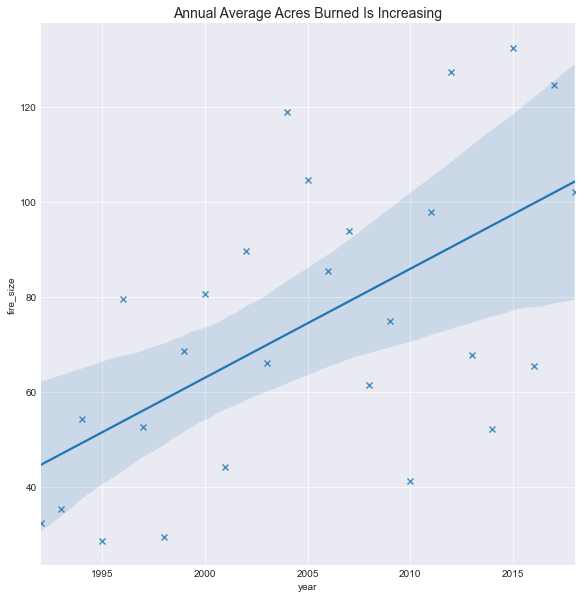

In [216]:
# plot scatterplot with regression line
# sns.color_palette("rocket", as_cmap=True)
sns.lmplot(x='year', y='fire_size', data=yearly_mean_fire_size, height=8, markers='x', seed=321, robust=True)
plt.title('Annual Average Acres Burned Is Increasing', size=14, color_palette='rocket')
plt.xlabel('Year')
plt.ylabel('Acres Burned');

In [ ]:
df.groupby('year').mean()

The smallest wildfire is only about 4.5 square feet

25% of fires are less than 1/10 of an acre

50% are less than one acre

75% are less than three acres

20% of fires are greater than 5 acres which is equivalent to three and a quarter football fields.

The largest wildfire is larger than 500,000 football fields or 85% of Rhode Island, our smallest state

---

#### I am going to create a column categorizing the fires as:

* small: up to the size of two tennis courts
* medium: up to the size of a football field
* large: up to the size of 4 football fields
* extra_lg: anything larger than this

In [ ]:
# create another column categorizing fire size
conditions = [df.fire_size <=.13, df.fire_size <=1.3, df.fire_size <=5.2, df.fire_size >5.2]
choices = ['small', 'medium', 'large', 'extra_lg']
df['size_category'] = np.select(conditions, choices)
df.head()

In [ ]:
df.size_category.value_counts(normalize=True)

In [ ]:
# plot size of fires by latitude and longitude
sns.scatterplot(x='longitude', y='latitude', hue='size_category', data=df)

### With all the fires plotted across all the years, we see that the large majority seems to be smaller fires. Alaska does have a large amount of extra-large fires

In [ ]:
# checking to see what the fire size and location looks like for 2006
sns.scatterplot(x='longitude', y='latitude', hue='size_category', data=df[df.year == 2006])

### It appears that the majority of the largest wildfires in 2006 happened in the central area of the US

In [71]:
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,year,month,decade,size_category
discovery_date,,,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,1992,January,1992 - 1999,small
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,1992,January,1992 - 1999,medium
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,1992,January,1992 - 1999,medium
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,1992,January,1992 - 1999,extra_lg
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,1992,January,1992 - 1999,extra_lg


In [218]:
df.groupby('state').fire_size.sum().sort_values(ascending=False).head()

state
AK    3.380111e+07
CA    1.637889e+07
ID    1.534732e+07
NV    1.151785e+07
TX    1.143388e+07
Name: fire_size, dtype: float64

In [234]:
y = df.groupby('state').fire_size.sum().sort_values(ascending=False).head(10).reset_index()
y.fire_size = round(y.fire_size/1_000_000)
y

,state,fire_size
0,AK,34.0
1,CA,16.0
2,ID,15.0
3,NV,12.0
4,TX,11.0
5,OR,10.0
6,MT,8.0
7,NM,7.0
8,AZ,6.0
9,WA,6.0


<AxesSubplot:xlabel='state', ylabel='fire_size'>

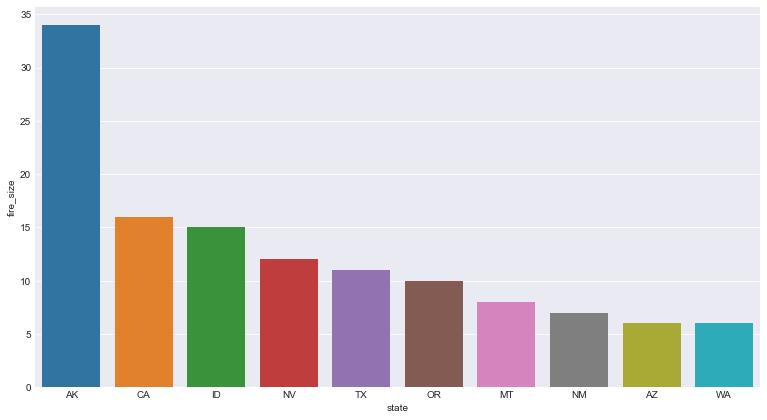

In [235]:
sns.barplot(x='state', y='fire_size', data=y)

In [228]:
df[df.state == 'AK'].fire_size.sum()

33801113.44218

### I am going to further explore extra-large fires to see if there's anything there.

In [101]:
lg_df = df[df.size_category == 'extra_lg']
lg_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 389896 entries, 1992-01-01 to 2018-12-31
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   fire_year         389896 non-null  int64         
 1   general_cause     389896 non-null  object        
 2   containment_date  230516 non-null  datetime64[ns]
 3   fire_size         389896 non-null  float64       
 4   latitude          389896 non-null  float64       
 5   longitude         389896 non-null  float64       
 6   state             389896 non-null  object        
 7   year              389896 non-null  int64         
 8   month             389896 non-null  object        
 9   decade            389896 non-null  object        
 10  size_category     389896 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 35.7+ MB


In [105]:

lg_df.fire_size.describe()

count    389896.000000
mean        417.844095
std        5966.498187
min           5.210000
25%          10.000000
50%          20.000000
75%          50.000000
max      662700.000000
Name: fire_size, dtype: float64

In [106]:
lg_df.general_cause.value_counts()

Debris and open burning                       96375
Arson/incendiarism                            89747
Missing data/not specified/undetermined       82768
Natural                                       53660
Equipment and vehicle use                     30907
Recreation and ceremony                        9535
Railroad operations and maintenance            7546
Smoking                                        6199
Power generation/transmission/distribution     5157
Misuse of fire by a minor                      4782
Fireworks                                      1707
Other causes                                    757
Firearms and explosives use                     756
Name: general_cause, dtype: int64

In [132]:
x = df[df.fire_size > 9]
x.general_cause.value_counts()

Arson/incendiarism                            72496
Debris and open burning                       72239
Missing data/not specified/undetermined       67890
Natural                                       46345
Equipment and vehicle use                     24836
Recreation and ceremony                        7147
Railroad operations and maintenance            5709
Smoking                                        4595
Power generation/transmission/distribution     4298
Misuse of fire by a minor                      3174
Fireworks                                      1401
Firearms and explosives use                     639
Other causes                                    575
Name: general_cause, dtype: int64

In [133]:

df[df.general_cause == 'Debris and open burning'].fire_size.describe()

count    507219.000000
mean         14.817821
std         416.741933
min           0.000100
25%           0.300000
50%           1.000000
75%           4.000000
max      162702.000000
Name: fire_size, dtype: float64

<AxesSubplot:>

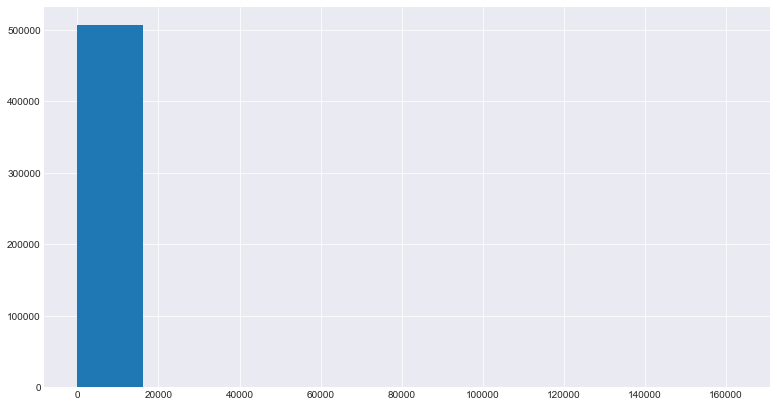

In [136]:

df[df.general_cause == 'Debris and open burning'].fire_size.hist()

In [140]:

df[(df.general_cause == 'Debris and open burning') & (df.fire_size > 50_000)].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 1999-10-31 to 2017-06-17
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fire_year         5 non-null      int64         
 1   general_cause     5 non-null      object        
 2   containment_date  5 non-null      datetime64[ns]
 3   fire_size         5 non-null      float64       
 4   latitude          5 non-null      float64       
 5   longitude         5 non-null      float64       
 6   state             5 non-null      object        
 7   year              5 non-null      int64         
 8   month             5 non-null      object        
 9   decade            5 non-null      object        
 10  size_category     5 non-null      object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 480.0+ bytes


In [134]:

df[df.general_cause == 'Natural'].fire_size.describe()

count    312807.000000
mean        312.325368
std        5600.967066
min           0.000100
25%           0.100000
50%           0.200000
75%           2.000000
max      606945.000000
Name: fire_size, dtype: float64

<AxesSubplot:>

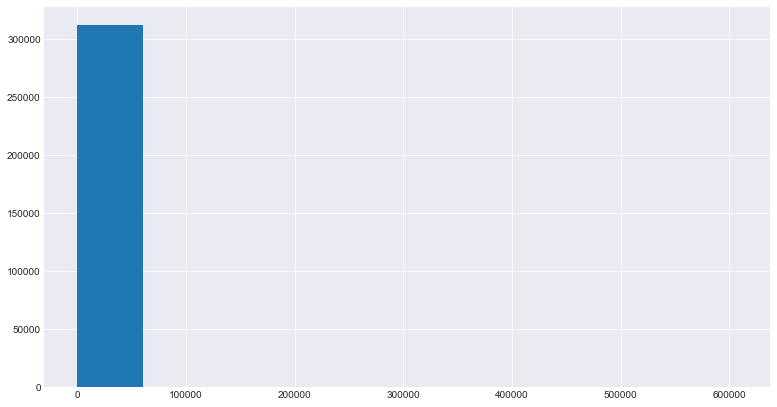

In [137]:

df[df.general_cause == 'Natural'].fire_size.hist()

In [141]:
df[(df.general_cause == 'Natural') & (df.fire_size > 50_000)].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 379 entries, 1992-08-02 to 2018-09-06
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fire_year         379 non-null    int64         
 1   general_cause     379 non-null    object        
 2   containment_date  359 non-null    datetime64[ns]
 3   fire_size         379 non-null    float64       
 4   latitude          379 non-null    float64       
 5   longitude         379 non-null    float64       
 6   state             379 non-null    object        
 7   year              379 non-null    int64         
 8   month             379 non-null    object        
 9   decade            379 non-null    object        
 10  size_category     379 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 35.5+ KB


In [135]:

df[df.general_cause == 'Arson/incendiarism'].fire_size.describe()

count    310320.000000
mean         33.995753
std        1036.544404
min           0.000100
25%           0.300000
50%           2.000000
75%           8.000000
max      259158.900000
Name: fire_size, dtype: float64

<AxesSubplot:>

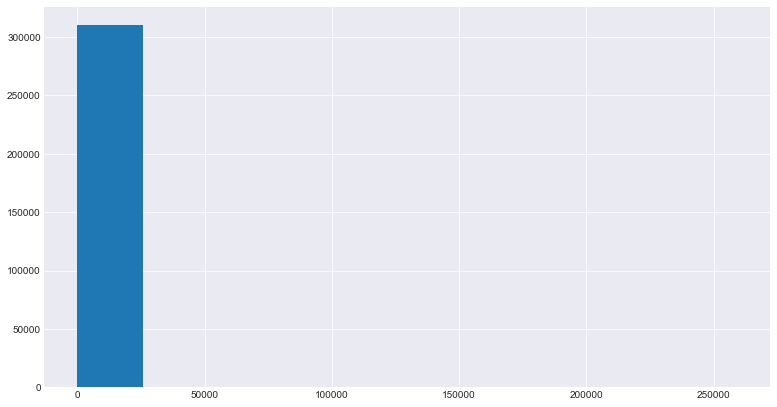

In [138]:
df[df.general_cause == 'Arson/incendiarism'].fire_size.hist()

In [142]:

df[(df.general_cause == 'Arson/incendiarism') & (df.fire_size > 50_000)].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 1992-08-20 to 2018-07-27
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fire_year         20 non-null     int64         
 1   general_cause     20 non-null     object        
 2   containment_date  18 non-null     datetime64[ns]
 3   fire_size         20 non-null     float64       
 4   latitude          20 non-null     float64       
 5   longitude         20 non-null     float64       
 6   state             20 non-null     object        
 7   year              20 non-null     int64         
 8   month             20 non-null     object        
 9   decade            20 non-null     object        
 10  size_category     20 non-null     object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 1.9+ KB


### Below is a list of states with the most and fewest amount of fires for each year in our dataset. Washington DC is most often the place with the fewest fires per year. Apart from DC, the states with the fewest fires per year include New England states such as Maryland, Vermont, Delaware, and Massachusetts; Puerto Rico had the fewest fires in 1996. California, Georgia, and Texas are the states with the greatest number of fires for every year except for 2018, during which Arizona had 9,738 fires.

In [72]:
# # Sophia
# # print max and min for num fires/year
# for year in list(range(1992, 2019)):
#     print(year)
#     print('Fewest fires:', df[df.fire_year == year].groupby('state').fire_size.count().idxmin(), df[df.fire_year == year].groupby('state').fire_size.count().min())
#     print('Most fires:',df[df.fire_year == year].groupby('state').fire_size.count().idxmax(), df[df.fire_year == year].groupby('state').fire_size.count().max())
#     print() b

### A teammate discovered that the annual number of wildfires for TX  that we had in our database almost doubled for each year for the period 2005 and after vs 1992 - 2004. I am going to do a little exploring to see if I can discover why there's such a difference.

In [77]:
# create separate dataframes for each period
texas_92 = df[(df.state == 'TX') & (df.fire_year < 2005)]
texas_05 = df[(df.state == 'TX') & (df.fire_year >= 2005)]
texas_05.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,year,month,decade,size_category
discovery_date,,,,,,,,,,,
2005-01-01,2005,Debris and open burning,2005-01-02,2.0,26.368889,-98.781944,TX,2005,January,2000 - 2009,large
2005-01-01,2005,Missing data/not specified/undetermined,NaT,2.0,32.671500,-95.704670,TX,2005,January,2000 - 2009,large
2005-01-01,2005,Debris and open burning,NaT,2.0,30.130750,-98.032000,TX,2005,January,2000 - 2009,large
2005-01-01,2005,Debris and open burning,NaT,2.0,30.117320,-98.049160,TX,2005,January,2000 - 2009,large
2005-01-01,2005,Debris and open burning,NaT,1.0,31.809150,-95.570000,TX,2005,January,2000 - 2009,medium


<AxesSubplot:xlabel='year', ylabel='count'>

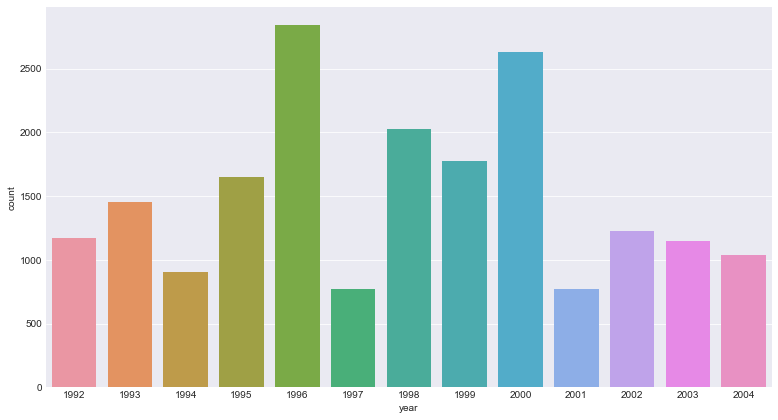

In [78]:
# plot counts by year for period prior to 2005
sns.countplot(data=texas_92, x='year')

<AxesSubplot:xlabel='year', ylabel='count'>

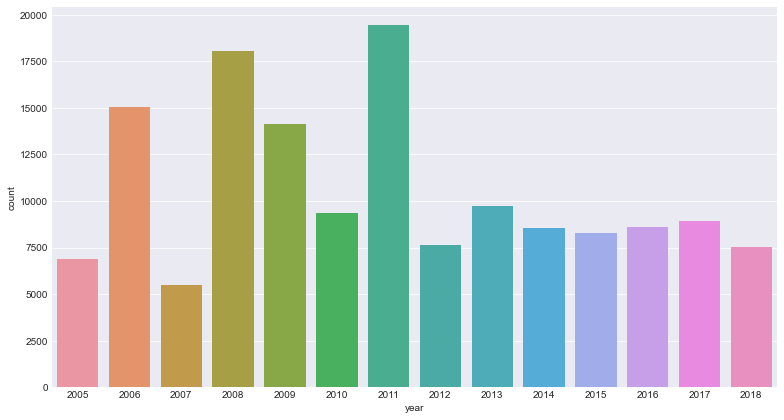

In [79]:
# plot counts by year for period 2005 and after
sns.countplot(data=texas_05, x='year')

### If we look at the numbers on the y-axis, the year with the most fires, 1996, in period pre-2005 is less than the year with the least fires 2007, in period 2005 and after. This is a huge jump and slightly suspicious. Climate change is causing an increase in wildfires but not with that much of a difference from one year to the next.

In [82]:
# check value counts for cause and normalize
texas_92.general_cause.value_counts(normalize=True)

Debris and open burning                       0.451571
Arson/incendiarism                            0.216744
Missing data/not specified/undetermined       0.153993
Natural                                       0.057908
Equipment and vehicle use                     0.047553
Smoking                                       0.022308
Recreation and ceremony                       0.020144
Misuse of fire by a minor                     0.013447
Railroad operations and maintenance           0.008140
Power generation/transmission/distribution    0.004276
Fireworks                                     0.003194
Other causes                                  0.000618
Firearms and explosives use                   0.000103
Name: general_cause, dtype: float64

In [83]:
# check value counts for cause and normalize
texas_05.general_cause.value_counts(normalize=True)

Debris and open burning                       0.394911
Missing data/not specified/undetermined       0.303831
Equipment and vehicle use                     0.122343
Natural                                       0.045818
Power generation/transmission/distribution    0.042079
Arson/incendiarism                            0.035388
Smoking                                       0.025852
Recreation and ceremony                       0.011012
Misuse of fire by a minor                     0.009455
Railroad operations and maintenance           0.007281
Fireworks                                     0.001592
Other causes                                  0.000433
Firearms and explosives use                   0.000007
Name: general_cause, dtype: float64

Debris and open burning as a cause is down 6%

Missing data as a cause is up 100%

Equipment and vehicle use as a cause is up 7%

### There's nothing here that stands out as the reason for more fires. The significant increase in missing data makes me wonder if there may just have been a change in recording wildfires.

In [84]:
# check stats for wildfire size to see if there's a difference
texas_92.fire_size.describe()

count    19410.000000
mean        62.760430
std        851.806241
min          0.100000
25%          1.000000
50%          4.000000
75%         15.000000
max      55375.000000
Name: fire_size, dtype: float64

In [85]:
# check stats for wildfire size to see if there's a difference
texas_05.fire_size.describe()

count    147651.000000
mean         69.188147
std        2502.909565
min           0.010000
25%           1.000000
50%           1.000000
75%           5.000000
max      479549.000000
Name: fire_size, dtype: float64

### The fact that there are many more smaller fires reaffirms my suspicions. It could be that prior to 2005 many of the smaller fires that were quicky contained were not documented and 2005 was when they started being more comprehensive in their documentation of fires. 

In [86]:
df[(df.state == 'TX') & (df.fire_year == 2004)].general_cause.value_counts(normalize=True)

Debris and open burning                       0.536538
Missing data/not specified/undetermined       0.171154
Arson/incendiarism                            0.123077
Equipment and vehicle use                     0.059615
Recreation and ceremony                       0.029808
Natural                                       0.029808
Smoking                                       0.025000
Misuse of fire by a minor                     0.011538
Railroad operations and maintenance           0.010577
Power generation/transmission/distribution    0.001923
Other causes                                  0.000962
Name: general_cause, dtype: float64

In [88]:
df[(df.state == 'TX') & (df.fire_year == 2005)].general_cause.value_counts(normalize=True)

Debris and open burning                       0.425446
Missing data/not specified/undetermined       0.278365
Equipment and vehicle use                     0.094914
Arson/incendiarism                            0.082452
Natural                                       0.039849
Smoking                                       0.033329
Recreation and ceremony                       0.019417
Misuse of fire by a minor                     0.015360
Railroad operations and maintenance           0.007825
Power generation/transmission/distribution    0.001739
Fireworks                                     0.000869
Other causes                                  0.000435
Name: general_cause, dtype: float64

In [89]:
df[(df.state == 'TX') & (df.fire_year == 2004)].fire_size.describe()

count    1040.000000
mean       33.224423
std       222.395655
min         0.100000
25%         1.000000
50%         3.000000
75%        10.000000
max      5150.000000
Name: fire_size, dtype: float64

In [90]:
df[(df.state == 'TX') & (df.fire_year == 2005)].fire_size.describe()

count     6901.000000
mean        41.856448
std        329.435861
min          0.100000
25%          1.000000
50%          3.000000
75%         10.000000
max      15130.000000
Name: fire_size, dtype: float64

In [145]:
df = pd.read_csv('fires.csv', index_col=None)
df.head()

,Unnamed: 0,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_INCIDENT_JOIN_ID,ICS_209_PLUS_COMPLEX_JOIN_ID,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,0,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2/2/2005 0:00,33,1300.0,Human,Power generation/transmission/distribution,NaN,2/2/2005 0:00,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,1,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,5/12/2004 0:00,133,845.0,Natural,Natural,NaN,5/12/2004 0:00,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,2,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,5/31/2004 0:00,152,1921.0,Human,Debris and open burning,NaN,5/31/2004 0:00,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,3,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,6/28/2004 0:00,180,1600.0,Natural,Natural,NaN,7/3/2004 0:00,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,4,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,6/28/2004 0:00,180,1600.0,Natural,Natural,NaN,7/3/2004 0:00,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County


In [146]:
df.FIRE_SIZE.sum()

164652421.82993254

In [147]:
df[df.FIRE_SIZE_CLASS == 'G'].FIRE_SIZE.sum()

122289718.13260001

In [148]:
df[df.FIRE_SIZE_CLASS != 'G'].FIRE_SIZE.sum()

42362703.697332546

In [149]:
df[df.FIRE_SIZE_CLASS == 'G'].FIRE_SIZE.sum() / df.FIRE_SIZE.sum()

0.7427143601866455

In [151]:
df[df.FIRE_SIZE_CLASS == 'G'].NWCG_GENERAL_CAUSE.value_counts()

Natural                                       2772
Missing data/not specified/undetermined        761
Equipment and vehicle use                      261
Arson/incendiarism                             183
Debris and open burning                        151
Power generation/transmission/distribution     115
Recreation and ceremony                        107
Smoking                                         29
Railroad operations and maintenance             22
Firearms and explosives use                     18
Fireworks                                       13
Other causes                                    12
Misuse of fire by a minor                       11
Name: NWCG_GENERAL_CAUSE, dtype: int64

<AxesSubplot:xlabel='FIRE_YEAR', ylabel='count'>

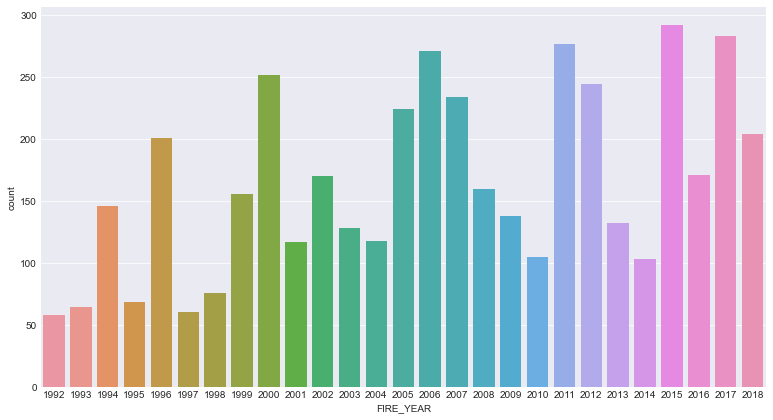

In [152]:
# plot counts by year
sns.countplot(data=df[df.FIRE_SIZE_CLASS == 'G'], x='FIRE_YEAR')

In [ ]:
# plot counts by month
sns.countplot(data=df, x='month')